<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-2%20%EA%B5%90%EC%B0%A8%20%EA%B2%80%EC%A6%9D%EA%B3%BC%20%EA%B7%B8%EB%A6%AC%EB%93%9C%20%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 교차 검증과 그리드 서치

## 검증 세트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# 분석용 데이터 입력
directory_for_ml = '../data/data_for_ml/'
fname = 'df_sec_sel.pkl'
f_name = directory_for_ml + fname
df = pd.read_pickle(f_name)

In [65]:
data = df.iloc[:, :-2]
target = df.iloc[:, -1]

In [66]:
cc = data.columns
cc

Index(['retail', 'foreigner', 'institution', 'financial', 'invtrust',
       'pension', 'privequity', 'open', 'high', 'low', 'close', 'vol',
       'dji_cr', 'ixic_cr', 'spx_cr', 'kosdaq_cr', 'kospi_cr', 'weekday'],
      dtype='object')

In [57]:
dd = df.iloc[:, -2:]
dd.head()

,value,close_cr
2022-06-21,3,0
2022-06-22,2,0
2022-06-23,2,0
2022-06-24,2,1
2022-06-27,3,1


<AxesSubplot:>

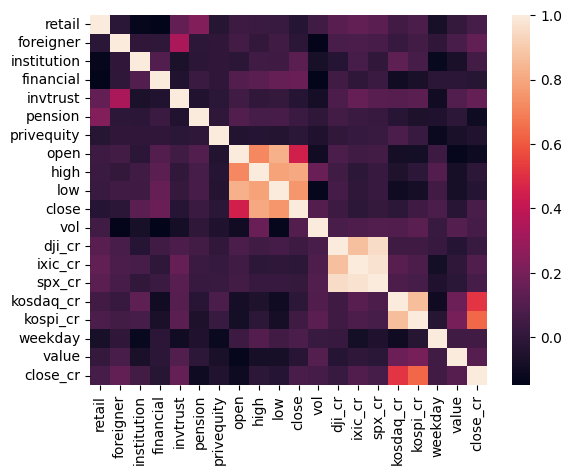

In [67]:
sns.heatmap(df.corr())

In [68]:
rand_num = 42
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=rand_num, stratify=target)

In [69]:
train_input

,retail,foreigner,institution,financial,invtrust,pension,privequity,open,high,low,close,vol,dji_cr,ixic_cr,spx_cr,kosdaq_cr,kospi_cr,weekday
2022-09-02,-5.804941,-1.181807,0.771258,1.022256,4.627989,-0.630187,-33.922100,0.008591,-0.016694,0.001718,-0.021776,0.036912,-1.07,-1.31,-1.07,-0.31,-0.26,3
2022-08-23,1.218316,-0.385049,2.617549,5.559621,-1.278132,-0.248652,-1.189790,-0.017915,-0.019481,-0.013201,-0.014778,0.174974,-0.47,0.00,-0.22,-1.56,-1.10,0
2022-11-25,0.768929,3.894598,-0.664377,-0.635334,-2.743017,-0.502107,2.406026,0.000000,0.006525,0.003295,0.006557,-0.069787,0.44,-0.52,-0.03,-0.63,-0.14,3
2022-08-05,-1.101275,-5.947055,-0.428543,1.335373,-1.190784,-0.950187,-1.724767,0.001623,0.003247,0.003279,0.003263,-0.087159,0.23,-0.50,-0.16,0.79,0.72,3
2022-06-30,2.710315,-7.491098,1.306022,12.743585,0.906137,-1.082715,-0.865413,-0.011824,-0.011765,-0.011925,-0.023569,0.069658,-0.80,-1.33,-0.88,-2.22,-1.91,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13,-1.148937,-0.967195,-0.657913,0.559070,-1.958350,-3.177536,0.278607,-0.011804,-0.015101,-0.010221,-0.011905,-0.293940,-0.69,-0.15,-0.45,1.65,0.47,1
2022-10-25,2.631393,16.326575,0.294189,0.036249,5.142411,-1.537370,-5.892697,0.034483,0.021314,0.029038,0.028623,0.513083,1.07,2.25,1.63,0.05,-0.05,0
2023-01-04,0.169405,-1.497937,2.219918,2.069714,-1.176775,-1.704002,-1.369405,-0.001802,-0.001783,-0.012681,-0.001802,0.339282,0.41,0.69,0.75,1.29,1.68,1
2022-11-02,-0.585848,-0.832276,2.810724,-8.803738,0.363023,-2.068750,-0.979376,0.030981,0.006678,0.025862,0.010101,-0.085299,-1.54,-3.36,-2.50,-0.38,0.07,1


In [70]:
sts = StandardScaler()
sts.fit(train_input)
train_scaled = sts.transform(train_input)
test_scaled = sts.transform(test_input)

훈련세트가 2만이 넘는다면 훈련세트로만 전체를 사용하고 val set는 없어도 되고, 데이터가 충분히 많다면 val set는 5~ 10%만 지정해서 사용해도 됨

In [71]:
print(train_input.shape, test_input.shape)

(124, 18) (31, 18)


In [72]:
dt = DecisionTreeClassifier(random_state=rand_num)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [73]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train_score : {} \ntest_score : {}'.format(train_score, test_score))

train_score : 1.0 
test_score : 0.7419354838709677


## 교차 검증 <br>
ML에서는 샘플수가 충분히 많지 않기 때문에 교차검증을 시행하여 최적의 파마미터을 찾게 되지만, 딥러닝에서는 샘플 수가 충분하여 교차검증을 하지 않고, 훈련세트와 검증세트로만 나누어 사용함 <br>
따라서, tensorflow, keras같은 경우는 gridsearchcv와 같은 기능이 그렇게 많지 않음. tensorflow, keras는 데이터을 읽어들이는 도구들이 많이 발달되어 있음.

In [48]:
from sklearn.model_selection import cross_validate

In [49]:
dt = DecisionTreeClassifier(random_state=rand_num)

In [50]:
scores = cross_validate(dt,
                        X = train_scaled, y=train_target,
                        cv=10, n_jobs=multiprocessing.cpu_count(),
                        verbose=1)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


In [51]:
scores

{'fit_time': array([0.00100017, 0.0024178 , 0.00200033, 0.00100017, 0.0015831 ,
        0.0010004 , 0.00200033, 0.00099993, 0.00200033, 0.00200081]),
 'score_time': array([0.00100017, 0.0005827 , 0.        , 0.0010004 , 0.        ,
        0.00099993, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.53846154, 0.38461538, 0.84615385, 0.76923077, 0.83333333,
        0.91666667, 0.75      , 0.33333333, 0.5       , 0.75      ])}

In [52]:
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

test score : 0.6621794871794872 (+/- 0.1953404031678961


'# dt.score(test_input, test_target) <br>
cross_validate에서의 fit기능은 무엇인가? <br>
.fit는 언제하는가?

#### 분류기(splitter) 사용 <br>
클라스가 고르게 섞이게 하기 위하여 사용 <br>
회귀모델에서는 KFold() 객체, 분류모델에서는 StratifiedKFold() 사용 <br>
cross_validate method에서는 estimator에 따라 분류인지, 회귀인지를 확인하고, cv를 StratifiedKFlod()를 사용할지 KFold를 사용할 지 자동으로 결정하여 진행함.

In [53]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt,
                        X = train_scaled, y=train_target,
                        cv=StratifiedKFold(10), 
                        n_jobs=multiprocessing.cpu_count(),
                        verbose=1)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  10 | elapsed:    0.0s finished


In [54]:
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

test score : 0.6621794871794872 (+/- 0.1953404031678961


위에서 cv=5를 적용한 cross_validate결과와 동일한 결과가 나옴.<br>
아래 splitter를 사용하여 상세하게 파라미터를 구성하여 사용

In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=rand_num)
scores = cross_validate(dt, train_scaled, train_target, cv=splitter)
print("test score : {} (+/- {}".format(scores['test_score'].mean(), scores['test_score'].std()))

## 하이퍼파라미터 튜닝 <br>
최적의 파라미터를 찾기 위한 loop실행

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
# dt = DecisionTreeClassifier(random_state=42)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  params,
                  n_jobs=-1) # -1:모든 cpu core를 사용
gs.fit(train_input, train_target)

In [ ]:
dt = gs.best_estimator_
dt_score = dt.score(train_input, train_target)
print('best estimator score: {}'.format(dt_score))

In [ ]:
print(gs.best_params_)

In [ ]:
for k, v in gs.cv_results_.items():
  if k == 'params':
    print('params')
    for k, v in params.items():
      print(k, v)
    continue
  print('{}: {}'.format(k, v))

In [ ]:
gs.cv_results_['mean_test_score']

In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

### 랜덤 서치

In [ ]:
from scipy.stats import uniform, randint
# from numpy.random import uniform, randint # 기능은 같고 모양은 틀리나, 객체를 생성하지 못함.(아래 예 참조)

In [ ]:
rgen = randint(0, 10)
rgen.rvs(10)

In [ ]:
np.unique(rgen.rvs(1000), return_counts=True)

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

In [ ]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42) #n_iter: params 의 임의변수를 100번 시행
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)

In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

In [ ]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

## 확인문제

In [ ]:
gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

## random number generator

In [ ]:
sample_list = np.random.choice(15, 6, replace=False) # 중복허용하지 않음.

In [ ]:
aa = np.sort(sample_list)
aa

In [ ]:
for i in range(10):
    sample_list = np.random.choice(15, 6, replace=False)
    aa = np.sort(sample_list)
    print(aa)
    